<a href="https://colab.research.google.com/github/jackshiels/casa0018/blob/main/CosWorkshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COS Implementation of the Hello World program

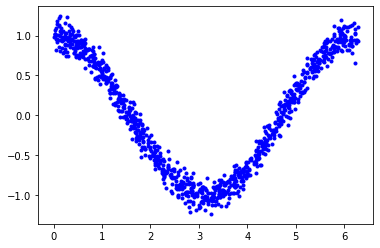

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600
38/38 [==============================] - 1s 9ms/step - loss: 0.5086 - mae: 0.6354 - val_loss: 0.4876 - val_mae: 0.6215
Epoch 2/600
38/38 [==============================] - 0s 5ms/step - loss: 0.4940 - mae: 0.6283 - val_loss: 0.4765 - val_mae: 0.6135
Epoch 3/600
38/38 [==============================] - 0s 4m

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

from tensorflow.keras import layers

samples = 1000
seed = 2334

np.random.seed(seed)
tf.random.set_seed(seed)

x_values = np.random.uniform(low = 0, high = 2 * math.pi, size = samples)
np.random.shuffle(x_values)

y_values = np.cos(x_values)
y_values += 0.1 * np.random.randn(*y_values.shape)

plt.plot(x_values, y_values, 'b.')
plt.show()

# Training split
train_split = int(0.6 * samples)
test_split = int(0.2 * samples + train_split)

x_train, x_test, x_validate = np.split(x_values, [train_split, test_split])
y_train, y_test, y_validate = np.split(y_values, [train_split, test_split])

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu', input_shape=(1,)),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.summary()

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
history = model.fit(x_train, y_train, epochs = 600, batch_size = 16, validation_data = (x_validate, y_validate))

In [10]:
test_loss, test_mae = model.evaluate(x_test, y_test)
print(test_loss)
print(test_mae)

# Create the directory
import os
MODELS_DIR = 'models/'
MODEL_COS_TF = MODELS_DIR + 'model'
MODEL_COS_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_COS_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_COS_TFLITE_MICRO = MODELS_DIR + 'model.cc'
     
# Save the model
model.save(MODEL_COS_TF)

7/7 [==============================] - 0s 3ms/step - loss: 0.0117 - mae: 0.0873
0.011699428781867027
0.08728564530611038


In [15]:
# Convert
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_COS_TF)

def representative_dataset_generator():
  for value in x_train:
    yield [np.array(value, dtype = np.float32, ndmin = 2)]

converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Enforce integer optimisation
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

# Create a data set
converter.representative_dataset = representative_dataset_generator

model_tflite = converter.convert()

# Save
open(MODEL_COS_TFLITE, "wb").write(model_tflite)

2648

In [17]:
# Install xxd if it is not available
!apt-get update && apt-get -qq install xxd
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_COS_TFLITE} > {MODEL_COS_TFLITE_MICRO}

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:9 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Reading package lists... Done


In [18]:
# Print the C source file
!cat {MODEL_COS_TFLITE_MICRO}

unsigned char models_model_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x1c, 0x00, 0x00, 0x00, 0x94, 0x00, 0x00, 0x00, 0xec, 0x00, 0x00, 0x00,
  0xa8, 0x03, 0x00, 0x00, 0xb8, 0x03, 0x00, 0x00, 0xfc, 0x09, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x0a, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00,
  0x0a, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x38, 0x00, 0x00, 0x00, 0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76,
  0x69, 0x6e, 0x67, 0x5f, 0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x94, 0xff, 0xff, 0xff,
  0x09, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x07, 0x00, 0x00, 0x00,
  0x64, 0x65, 0x6e, 0x73, 0x65, 0x5f, 0x38, 0x00, 0x01, 0x00, 0x00, 0x00